# 라이브러리 불러오기

In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
import time
import re

# 파일 불러오기
* 방문 날짜가 2020년으로만 되어있는 리뷰들

In [2]:
raw = pd.read_excel('review_crawling_final.xlsx')

In [3]:
raw

,Unnamed: 0,공연명,공연 장소,공연 기간,공연 시간,관람 연령,가격,장르,리뷰 내용,예약자ID,방문 날짜
0,0,장화 신은 고양이 비긴즈,국립중앙박물관 극장 용,2019.12.14 ~ 2020.02.09,70분,36개월이상,"66,000원",뮤지컬,11세되는 아이는 조금 지루해보였는데 마지막에 커튼콜후에 다같이 춤추며 노래하며 ...,rlqm****,2020. 2. 3
1,1,장화 신은 고양이 비긴즈,국립중앙박물관 극장 용,2019.12.14 ~ 2020.02.09,70분,36개월이상,"66,000원",뮤지컬,아이들이 즐거워 했어요,huni****,2020. 2. 3
2,2,장화 신은 고양이 비긴즈,국립중앙박물관 극장 용,2019.12.14 ~ 2020.02.09,70분,36개월이상,"66,000원",뮤지컬,아이가 재미있어 하네요.,best****,2020. 2. 3
3,3,장화 신은 고양이 비긴즈,국립중앙박물관 극장 용,2019.12.14 ~ 2020.02.09,70분,36개월이상,"66,000원",뮤지컬,퀄리티가 매우 높았어요!! 무대 구성이나 배우들의 안무 노래 퀄리티가 매우 좋아서...,kw****,2020. 2. 3
4,4,장화 신은 고양이 비긴즈,국립중앙박물관 극장 용,2019.12.14 ~ 2020.02.09,70분,36개월이상,"66,000원",뮤지컬,취소할까하다. 마스크쓰고 봤네요 ^^ 아이가 넘 좋아해요. 커튼콜 촬영가능하고 아...,byeo*****,2020. 2. 3
...,...,...,...,...,...,...,...,...,...,...,...
7275,7275,더 북 - 성경이 된 사람들,광야아트센터,2021.01.09 ~ 2021.03.01,165분,만 7세이상,"35,000원",뮤지컬,기도합니다.,wsun*****,2020. 10. 18
7276,7276,더 북 - 성경이 된 사람들,광야아트센터,2021.01.09 ~ 2021.03.01,165분,만 7세이상,"35,000원",뮤지컬,정말 감동 그 자체입니다.초등학교4학년 딸아이와 아이친구를 데리고 가서 봤는데 아...,ebbu***,2020. 10. 18
7277,7277,더 북 - 성경이 된 사람들,광야아트센터,2021.01.09 ~ 2021.03.01,165분,만 7세이상,"35,000원",뮤지컬,생생한 성령의감동과 은혜가 넘쳤어요!,sori***,2020. 10. 18
7278,7278,더 북 - 성경이 된 사람들,광야아트센터,2021.01.09 ~ 2021.03.01,165분,만 7세이상,"35,000원",뮤지컬,"방역 소독 철저히 하고 입장했어요~뮤지컬 너무 퀄리티 좋았고 같이 관람한 언니도,...",idne*****,2020. 10. 18


# 리뷰 텍스트 전처리

In [4]:
raw_review = raw['리뷰 내용'].astype(str)

In [5]:
raw_review

0        11세되는 아이는 조금 지루해보였는데 마지막에 커튼콜후에 다같이 춤추며 노래하며 ...
1                                           아이들이 즐거워 했어요 
2                                          아이가 재미있어 하네요. 
3        퀄리티가 매우 높았어요!! 무대 구성이나 배우들의 안무 노래 퀄리티가 매우 좋아서...
4        취소할까하다. 마스크쓰고 봤네요 ^^ 아이가 넘 좋아해요. 커튼콜 촬영가능하고 아...
                              ...                        
7275                                              기도합니다. 
7276     정말 감동 그 자체입니다.초등학교4학년 딸아이와 아이친구를 데리고 가서 봤는데 아...
7277                                생생한 성령의감동과 은혜가 넘쳤어요! 
7278     방역 소독 철저히 하고 입장했어요~뮤지컬 너무 퀄리티 좋았고 같이 관람한 언니도,...
7279              매번 공연 바뀔때마다 보고있는데요.너무 만족스럽고, 또 보러갈꺼에요. 
Name: 리뷰 내용, Length: 7280, dtype: object

In [6]:
type(raw_review)

pandas.core.series.Series

# Preprocessing 
* 맞춤법 체크: https://github.com/ssut/py-hanspell

In [16]:
from konlpy.tag import Okt
from collections import Counter
import collections

# 맞춤법 체크
from hanspell import spell_checker

In [17]:
# Okt 객체 선언
okt = Okt()

## 명사만 분리
* Noun인 경우만 분리!

In [19]:
def segmentation_sub(tagged_review):
    noun = []
    noun_count = 0
    for sentence in tagged_review:
        if sentence[1] == 'Noun':
            noun.append(sentence)
            noun_count += 1
        else: continue
    return noun, noun_count

## 전처리 최종 함수

In [20]:
def noun_segmentation(review):
    
    ### (1) 정제 ###
    
    # 텍스트 양옆 공백 제거
    review = review.strip()
    
    # ParseError 일으키는 특수문자 제거
    review = review.replace("&", " and ")
    review = review.replace("~", "")
    
    # 텍스트 중간 공백은 하나만 남기기
    review = " ".join(review.split())
    
    ### (2) 맞춤법 체크 ###
    try:
        spell_check = spell_checker.check(review)
        spell_dict = spell_check.as_dict()

        if spell_dict['result'] == True:
            # 맞춤법 체크 성공 >> True가 나오는 경우
            spelled = spell_dict['checked']
            spell_result = "TRUE"

        else:
            # 맞춤법 체크 실패 >> False가 나오는 경우
            spelled = review
            spell_result = "FALSE"

    except:
        spelled = review
        spell_result = "FALSE"
        
    ### (3) 토큰화 및 품사태깅 ###
    tagged_review = okt.pos(spelled)
    
    ### (4) 명사 분리 ###
    noun, count = segmentation_sub(tagged_review)
    
    return noun, count, tagged_review

## 전처리 및 저장

In [21]:
tagged_noun = []
noun_count = []
tagged_review = []

for review in tqdm(raw_review):
    noun, count, tagged = noun_segmentation(review)
    
    tagged_noun.append(noun)
    noun_count.append(count)
    tagged_review.append(tagged)
    
    time.sleep(0.05)

100%|██████████████████████████████████████████████████████████████████████████████| 7280/7280 [17:14<00:00,  7.04it/s]


# 명사만 추출

In [22]:
def sub_func(review):
    noun = []
    for sentence in review:
        noun.append(sentence[0])
    return noun

In [23]:
noun = []
for review in tqdm(tagged_noun):
    w = sub_func(review)
    
    noun.append(w)

100%|██████████████████████████████████████████████████████████████████████████| 7280/7280 [00:00<00:00, 352450.32it/s]


## 명사 빈도

In [34]:
# 단일 리스트로 만들기
noun_list = []
for w in noun:
    noun_list += w

In [35]:
counts = collections.Counter(noun_list)

In [36]:
type(counts)

collections.Counter

## 내림차순 정리

In [38]:
count_sort = sorted(counts.items(), key=lambda k:k[1], reverse=True)

In [39]:
# 상위 30개만
visualization = sorted(counts.items(), key=lambda k:k[1], reverse=True)[:30]; visualization

[('배우', 1926),
 ('공연', 1457),
 ('연극', 1276),
 ('연기', 1255),
 ('아이', 1121),
 ('정말', 1061),
 ('시간', 1032),
 ('보고', 937),
 ('뮤지컬', 752),
 ('것', 697),
 ('수', 615),
 ('노래', 553),
 ('최고', 550),
 ('또', 520),
 ('감동', 511),
 ('만', 471),
 ('진짜', 470),
 ('더', 462),
 ('거', 436),
 ('관람', 400),
 ('무대', 374),
 ('번', 374),
 ('추천', 367),
 ('안', 363),
 ('내용', 349),
 ('생각', 347),
 ('분', 346),
 ('중간', 337),
 ('코로나', 322),
 ('볼', 286)]

In [40]:
score = []
name = []
for w in visualization:
    name.append(w[0])
    score.append(w[1])

# 시각화 | 30개 정도만

In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이로 폰트가 선명하게 표시되도록 함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

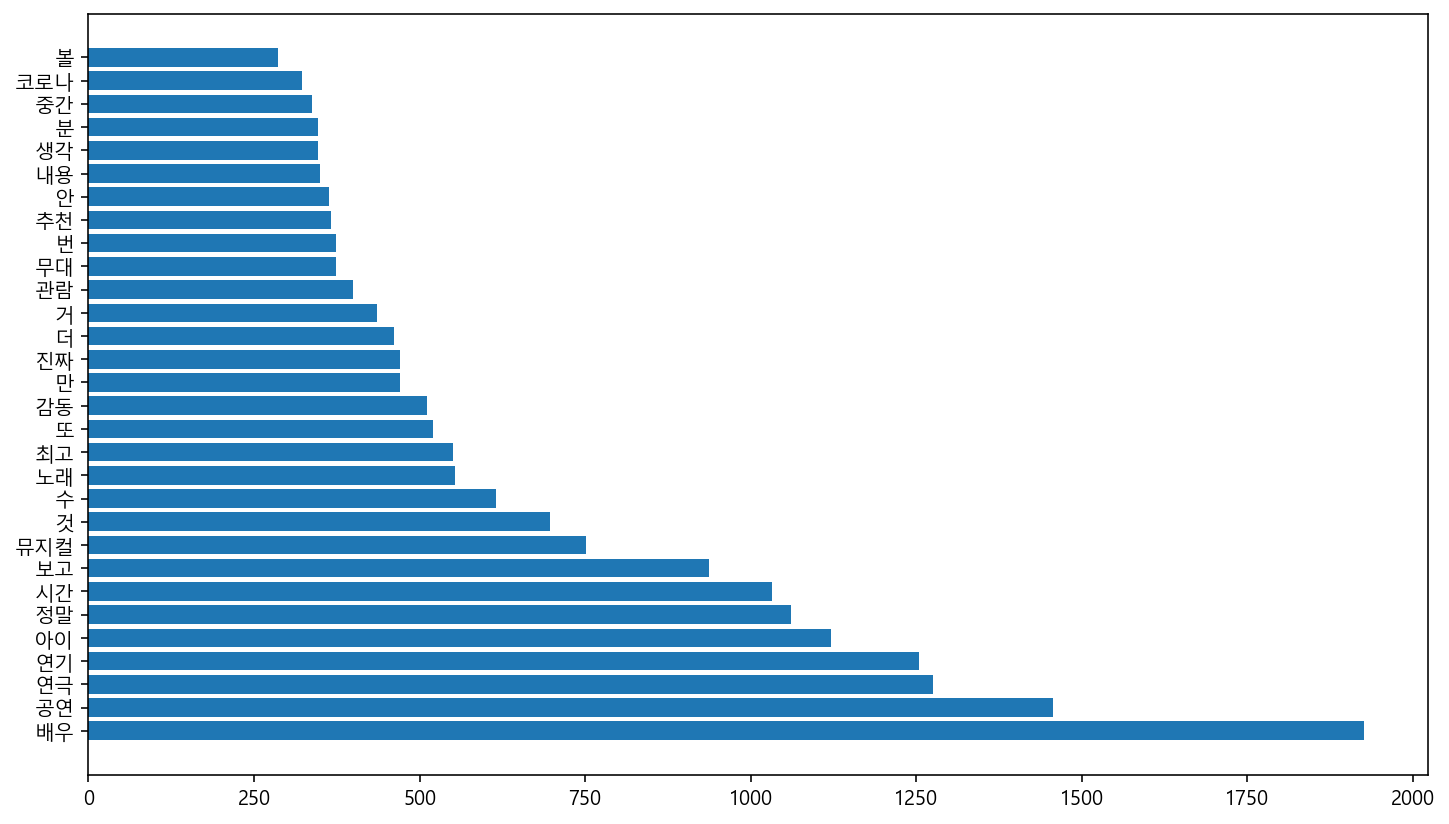

In [43]:
plt.figure(figsize=(12,7))
plt.barh(name,score)
plt.show()

# 기존 raw 데이터프레임에 추가 삽입

In [44]:
# 전처리 파일
raw['Noun count'] = noun_count
raw['Tagged Noun'] = tagged_noun
raw['Noun'] = noun
raw['Tagged review'] = tagged_review

# 명사 빈도 데이터 프레임

In [49]:
score = []
name = []
for w in count_sort:
    name.append(w[0])
    score.append(w[1])

In [50]:
# 명사 빈도 파일
counts_df = pd.DataFrame({'Noun':name, 'Frequency': score})

# 엑셀파일 저장

In [46]:
import xlsxwriter

## 전처리 파일

In [ ]:
writer = pd.ExcelWriter(
    'tagged_sentence_review.xlsx',
    engine = 'xlsxwriter'
)

raw.to_excel(writer, sheet_name = "preprocessed")
writer.save()

## 명사 빈도 파일

In [52]:
writer = pd.ExcelWriter(
    'noun_frequency.xlsx',
    engine = 'xlsxwriter'
)

counts_df.to_excel(writer, sheet_name = "frequency")
writer.save()